In [1]:
import pandas as pd
data=pd.read_csv('APM_FILE_ORDER_MHANSEN_03142019205647 2.csv')
data.head()

,DEP_YYYYMM,DEP_DAY,DEP_HOUR,DEP_QTR,ARR_YYYYMM,ARR_DAY,ARR_HOUR,ARR_QTR,OFF_YYYYMM,OFF_DAY,...,OAG_S_ARR,T_OAG_S_AR,ADJ_OAG_ARR,T_ADJ_OAG_ARR,OOOI_ARR,T_OOOI_ARR,DELAY_TI,DIF_G2G,O_ARR_DEL,DELAY_ARR
0,201804,24,11,1,201804,24,16,3,201804,24,...,1209069030,16:30,1209069030,16:30,1209068334,16:18,0.9,0,0,0
1,201801,7,6,3,201801,7,11,2,201801,7,...,1199805580,11:19,1199805580,11:19,1199804764,11:06,0.0,0,0,0
2,201803,9,1,3,201803,9,2,3,201803,9,...,1205048262,02:37,1205048262,02:37,1205050094,03:08,0.0,16,31,31
3,201804,1,13,3,201804,1,15,1,201804,1,...,1207077162,15:12,1207077162,15:12,1207080274,16:04,0.0,9,52,52
4,201801,9,22,1,201801,10,0,3,201801,9,...,1200026082,00:34,1200026082,00:34,1200024032,00:00,0.0,0,0,0


In [2]:
len(data)

220358

In [3]:
taxi_out=data[['OOOI_DEP','T_OOOI_DEP','TAXI_OUT']]
taxi_out.head()

,OOOI_DEP,T_OOOI_DEP,TAXI_OUT
0,1209050040,11:14,21
1,1199792182,06:36,23
2,1205045040,01:44,23
3,1207073580,14:13,19
4,1200018240,21:24,17


In [4]:
taxi_out['time']=pd.to_datetime(taxi_out['OOOI_DEP'], unit='s',origin=pd.Timestamp('1980-01-01'))
taxi_out['time']=pd.to_datetime(taxi_out['time']).dt.tz_localize("GMT").dt.tz_convert('US/Eastern').dt.tz_localize(None)
taxi_out['day']=taxi_out['time'].dt.dayofweek+1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [5]:
taxi_out['hour']=taxi_out['time'].dt.hour
taxi_out.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,OOOI_DEP,T_OOOI_DEP,TAXI_OUT,time,day,hour
0,1209050040,11:14,21,2018-04-24 11:14:00,2,11
1,1199792182,06:36,23,2018-01-07 06:36:22,7,6
2,1205045040,01:44,23,2018-03-09 01:44:00,5,1
3,1207073580,14:13,19,2018-04-01 14:13:00,7,14
4,1200018240,21:24,17,2018-01-09 21:24:00,2,21


In [6]:
cluster=taxi_out[['time','TAXI_OUT','hour']].set_index('time')

In [7]:
import numpy as np
cluster_re=cluster.groupby([pd.Grouper(freq="D"),'hour']).agg(np.mean)
#clusterday=clusterday.unstack(level=-1)
#cluster=taxi_out.groupby([taxi_out.time.dt.hour])#['TAXI_OUT'].agg(np.mean)

## Start Here

In [8]:
clusterday=cluster_re.reset_index()
print(len(clusterday))
clusterday.head()

8636


,time,hour,TAXI_OUT
0,2018-01-01,0,22.142857
1,2018-01-01,1,20.833333
2,2018-01-01,2,19.500000
3,2018-01-01,3,14.000000
4,2018-01-01,4,19.000000


In [19]:
clusterday['time']=pd.to_datetime(clusterday['time'])
clusterday['dayofweek']=clusterday['time'].dt.dayofweek
clusterday['day']=clusterday['time'].dt.day
clusterday['month']=clusterday['time'].dt.month
clusterday['previous1']=clusterday['TAXI_OUT'].shift(periods=1)
clusterday['pre6_avg']=clusterday['TAXI_OUT'].rolling(4).mean()
clusterday=clusterday.dropna()
print(len(clusterday))
clusterday.head(10)

8629


,time,hour,TAXI_OUT,dayofweek,day,month,previous1,pre6_avg
7,2018-01-01,7,22.393939,0,1,1,22.933333,20.706818
8,2018-01-01,8,30.272727,0,1,1,22.393939,23.525000
9,2018-01-01,9,25.655172,0,1,1,30.272727,25.313793
10,2018-01-01,10,25.875000,0,1,1,25.655172,26.049210
11,2018-01-01,11,28.578947,0,1,1,25.875000,27.595462
12,2018-01-01,12,34.000000,0,1,1,28.578947,28.527280
13,2018-01-01,13,37.400000,0,1,1,34.000000,31.463487
14,2018-01-01,14,22.827586,0,1,1,37.400000,30.701633
15,2018-01-01,15,27.225806,0,1,1,22.827586,30.363348
16,2018-01-01,16,21.787879,0,1,1,27.225806,27.310318


In [20]:
feature=clusterday.drop(['time','TAXI_OUT'],axis=1)
feature_list = list(feature.columns)
feature=np.array(feature)
labels = np.array(clusterday['TAXI_OUT'])

In [29]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(feature, labels, test_size = 0.25, random_state = 42)


In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_x, train_y)
predictions = rf.predict(test_x)
errors = abs(predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.41 degrees.


In [31]:
mape = 100 * (errors / test_y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.27 %.


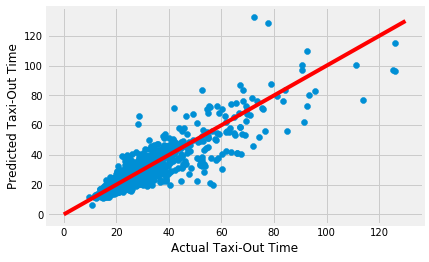

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0, 130, 1000)
plt.scatter(predictions,test_y)
plt.plot(x,x,color='r')
plt.xlabel('Actual Taxi-Out Time')
plt.ylabel('Predicted Taxi-Out Time');

In [33]:
from sklearn.tree import export_graphviz
import pydot
#tree = rf.estimators_[5]

#export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
#(graph, ) = pydot.graph_from_dot_file('tree.dot')
#graph.write_png('tree.png')

In [34]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: previous1            Importance: 0.56
Variable: pre6_avg             Importance: 0.27
Variable: hour                 Importance: 0.1
Variable: day                  Importance: 0.03
Variable: month                Importance: 0.03
Variable: dayofweek            Importance: 0.02


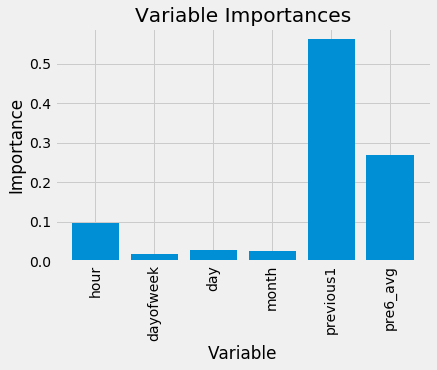

In [35]:
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

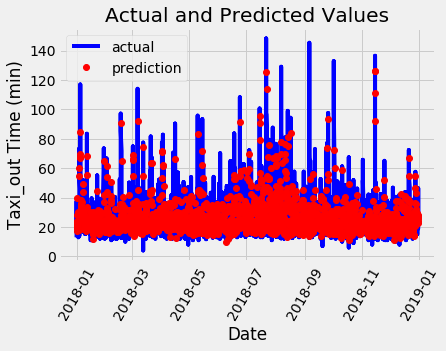

In [36]:
import datetime
year=2018
months = feature[:, feature_list.index('month')]
days = feature[:, feature_list.index('day')]
# List and then convert to datetime object
dates = [ str(year) + '-' +str(int(month)) + '-' + str(int(day)) for month, day in zip(months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

year=2018
months = test_x[:, feature_list.index('month')]
days = test_x[:, feature_list.index('day')]

test_dates = [str(2018) + '-' +str(int(month)) + '-' + str(int(day)) for month, day in zip(months, days)]
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
plt.xlabel('Date'); plt.ylabel('Taxi_out Time (min)'); plt.title('Actual and Predicted Values');

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
a=[0,1,2,3,4,5,6,7,8,9,10,11,12]

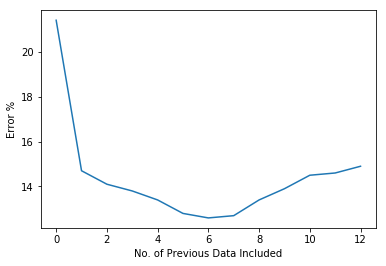

In [8]:
b=[21.4,14.7,14.1,13.8, 13.4,12.8,12.6,12.7,13.4,13.9,14.5,14.6,14.9]
plt.plot(a,b)
plt.xlabel('No. of Previous Data Included')
plt.ylabel('Error %');